### 화면 가로 확장

In [35]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 모듈 임포트

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf
import csv
import os

### 3년치 데이터 합본 저장, 확인

In [37]:
df_3Y = pd.DataFrame()
for y in range(2013, 2016):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_3Y = pd.concat([df_3Y, df_y])
    
df_3Y = df_3Y.drop([df_3Y.columns[0]], axis=1)
df_3Y = df_3Y.reset_index(drop=True)
df_3Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-15.csv", encoding='cp949')

In [38]:
Data_3Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-15.csv', encoding='cp949')
Data_3Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26280 non-null  int64  
 1   DateTime    26280 non-null  object 
 2   Day         26280 non-null  object 
 3   Holiday     26280 non-null  int64  
 4   Seq         26280 non-null  int64  
 5   Watt        26280 non-null  int64  
 6   Temp        26280 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.4+ MB


### 각 연도별 csv 데이터 로드

In [39]:
Data_2013=pd.read_csv('./Combined_Data/2013_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2014=pd.read_csv('./Combined_Data/2014_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2015=pd.read_csv('./Combined_Data/2015_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2016=pd.read_csv('./Combined_Data/2016_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')

### Plt 그래프 함수

In [40]:
def Graph(name1, name2, year):
    # 1번째 그래프
    ax1 = plt.subplot(2, 1, 1)
    ax1.spines['left'].set_color('yellow')
    ax1.spines['left'].set_lw(2)
    ax1.spines['bottom'].set_color('yellow')
    ax1.spines['bottom'].set_lw(2)

    ax1.tick_params(axis='x', colors='white', size=10)
    ax1.tick_params(axis='x', colors='white', labelsize=15)
    ax1.tick_params(axis='y', colors='white', size=10)
    ax1.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y1, '.-', color='y', linewidth=1)
    plt.title(name1, fontdict=font_head, pad=20)
    plt.xticks(visible=False)
    plt.ylabel('Watt',labelpad=15, fontdict=font_body)

    # 2번째 그래프
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.spines['left'].set_color('blue')
    ax2.spines['left'].set_lw(2)
    ax2.spines['bottom'].set_color('blue')
    ax2.spines['bottom'].set_lw(2)

    ax2.tick_params(axis='x', colors='white', size=10)
    ax2.tick_params(axis='x', colors='white', labelsize=15)
    ax2.tick_params(axis='y', colors='white', size=10)
    ax2.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y2, '.-', color='b', linewidth=1)
    plt.title(name2, fontdict=font_head, pad=20)
    plt.xlabel('Time',labelpad=15, fontdict=font_body)
    plt.ylabel('Temp',labelpad=15, fontdict=font_body)
    
    if year==1:
        plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if year==3:
        plt.xticks([0, 365, 730], labels=['2013', '2014', '2015'])
        
    plt.tight_layout()
    plt.show()

### 13년도 그래프 확인

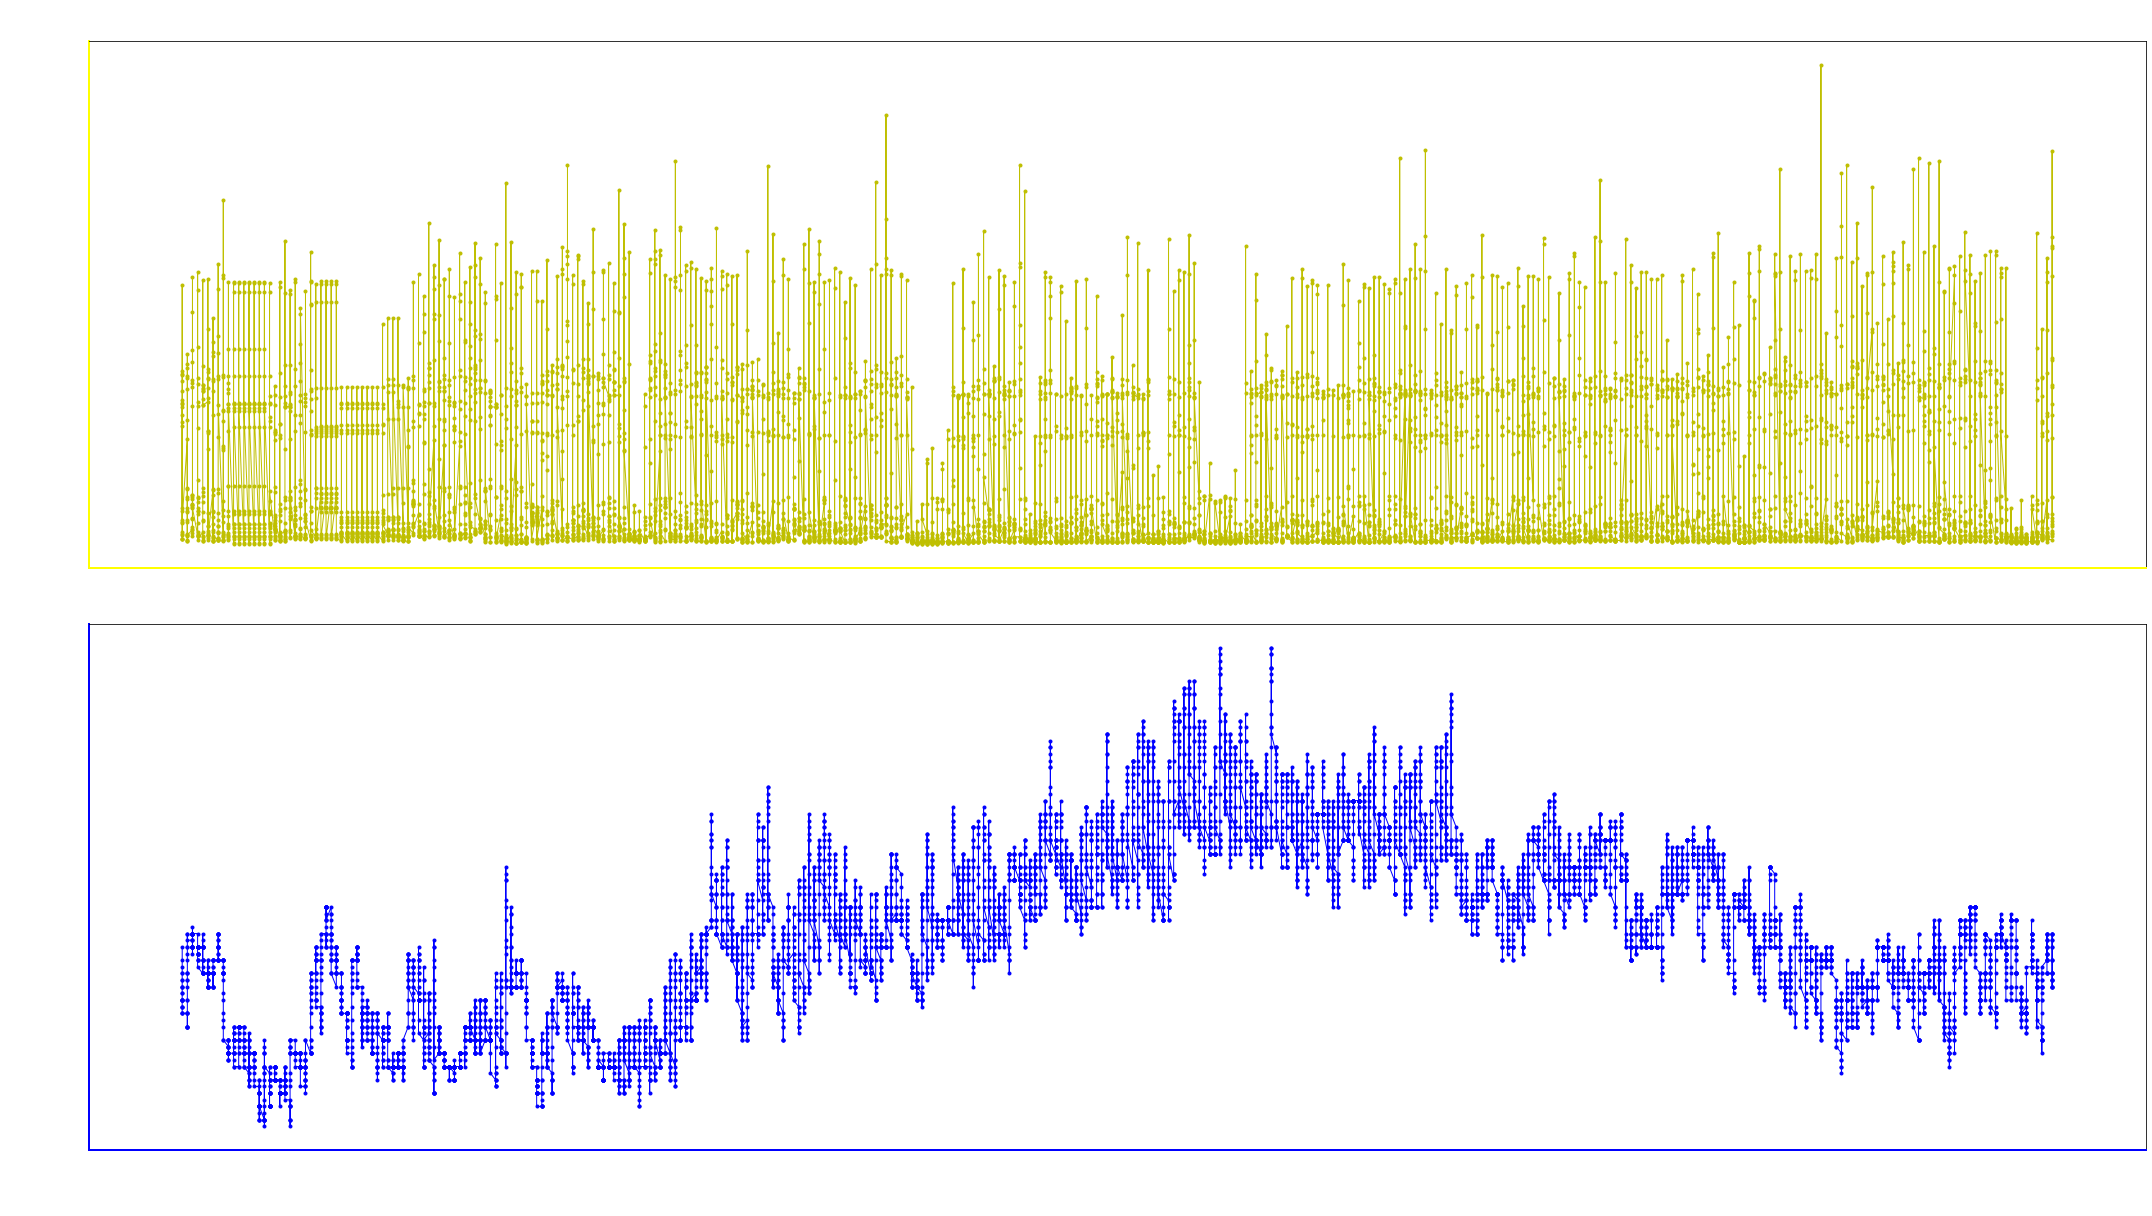

In [41]:
x = Data_2013['DateTime']

y1 = Data_2013['Watt']
y2 = Data_2013['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2013's Time-Watt Graph", "2013's Time-Temp Graph", 1)

### 3년치 데이터 그래프 확인

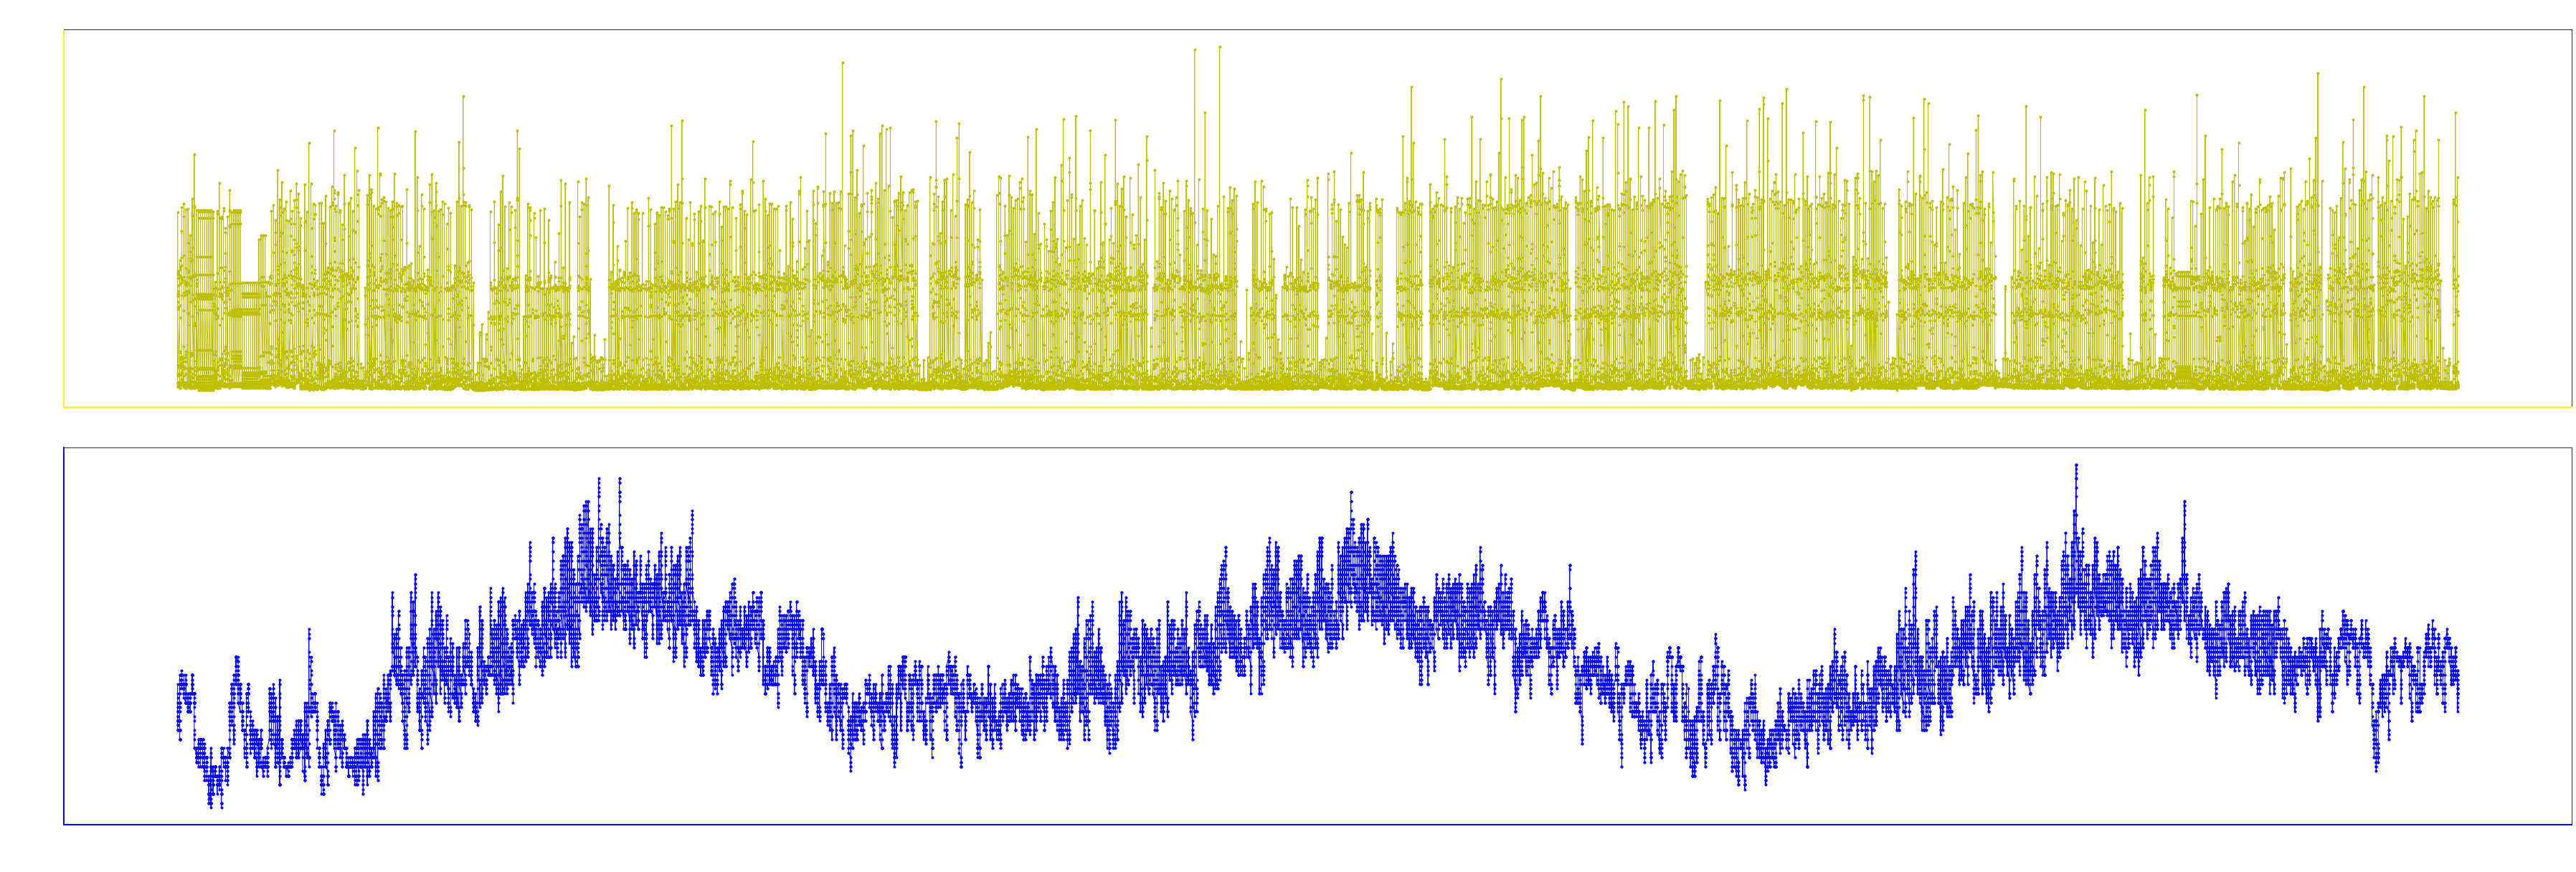

In [42]:
x = Data_3Y['DateTime']

y1 = Data_3Y['Watt']
y2 = Data_3Y['Temp']
plt.figure(figsize=(50,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("13-15's Time-Watt Graph","13-15's Time-Temp Graph", 3)

### 데이터 정규화

#### Train Set 3년치 정규화

In [55]:
from sklearn.preprocessing import MinMaxScaler

Data_3Y.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', 'Temp']
Data_3Y_scaled = scaler.fit_transform(Data_3Y[scale_cols])
Data_3Y_scaled = pd.DataFrame(Data_3Y_scaled)
Data_3Y_scaled.columns = scale_cols

Data_3Y_scaled=Data_3Y_scaled.reset_index()
Data_3Y_scaled

,index,Holiday,Watt,Temp
0,0,1.0,0.280670,0.360000
1,1,1.0,0.279092,0.333333
2,2,1.0,0.274117,0.320000
3,3,1.0,0.010072,0.306667
4,4,1.0,0.009465,0.306667
...,...,...,...,...
26275,26275,0.0,0.308094,0.333333
26276,26276,0.0,0.230191,0.320000
26277,26277,0.0,0.050237,0.306667
26278,26278,0.0,0.054969,0.293333


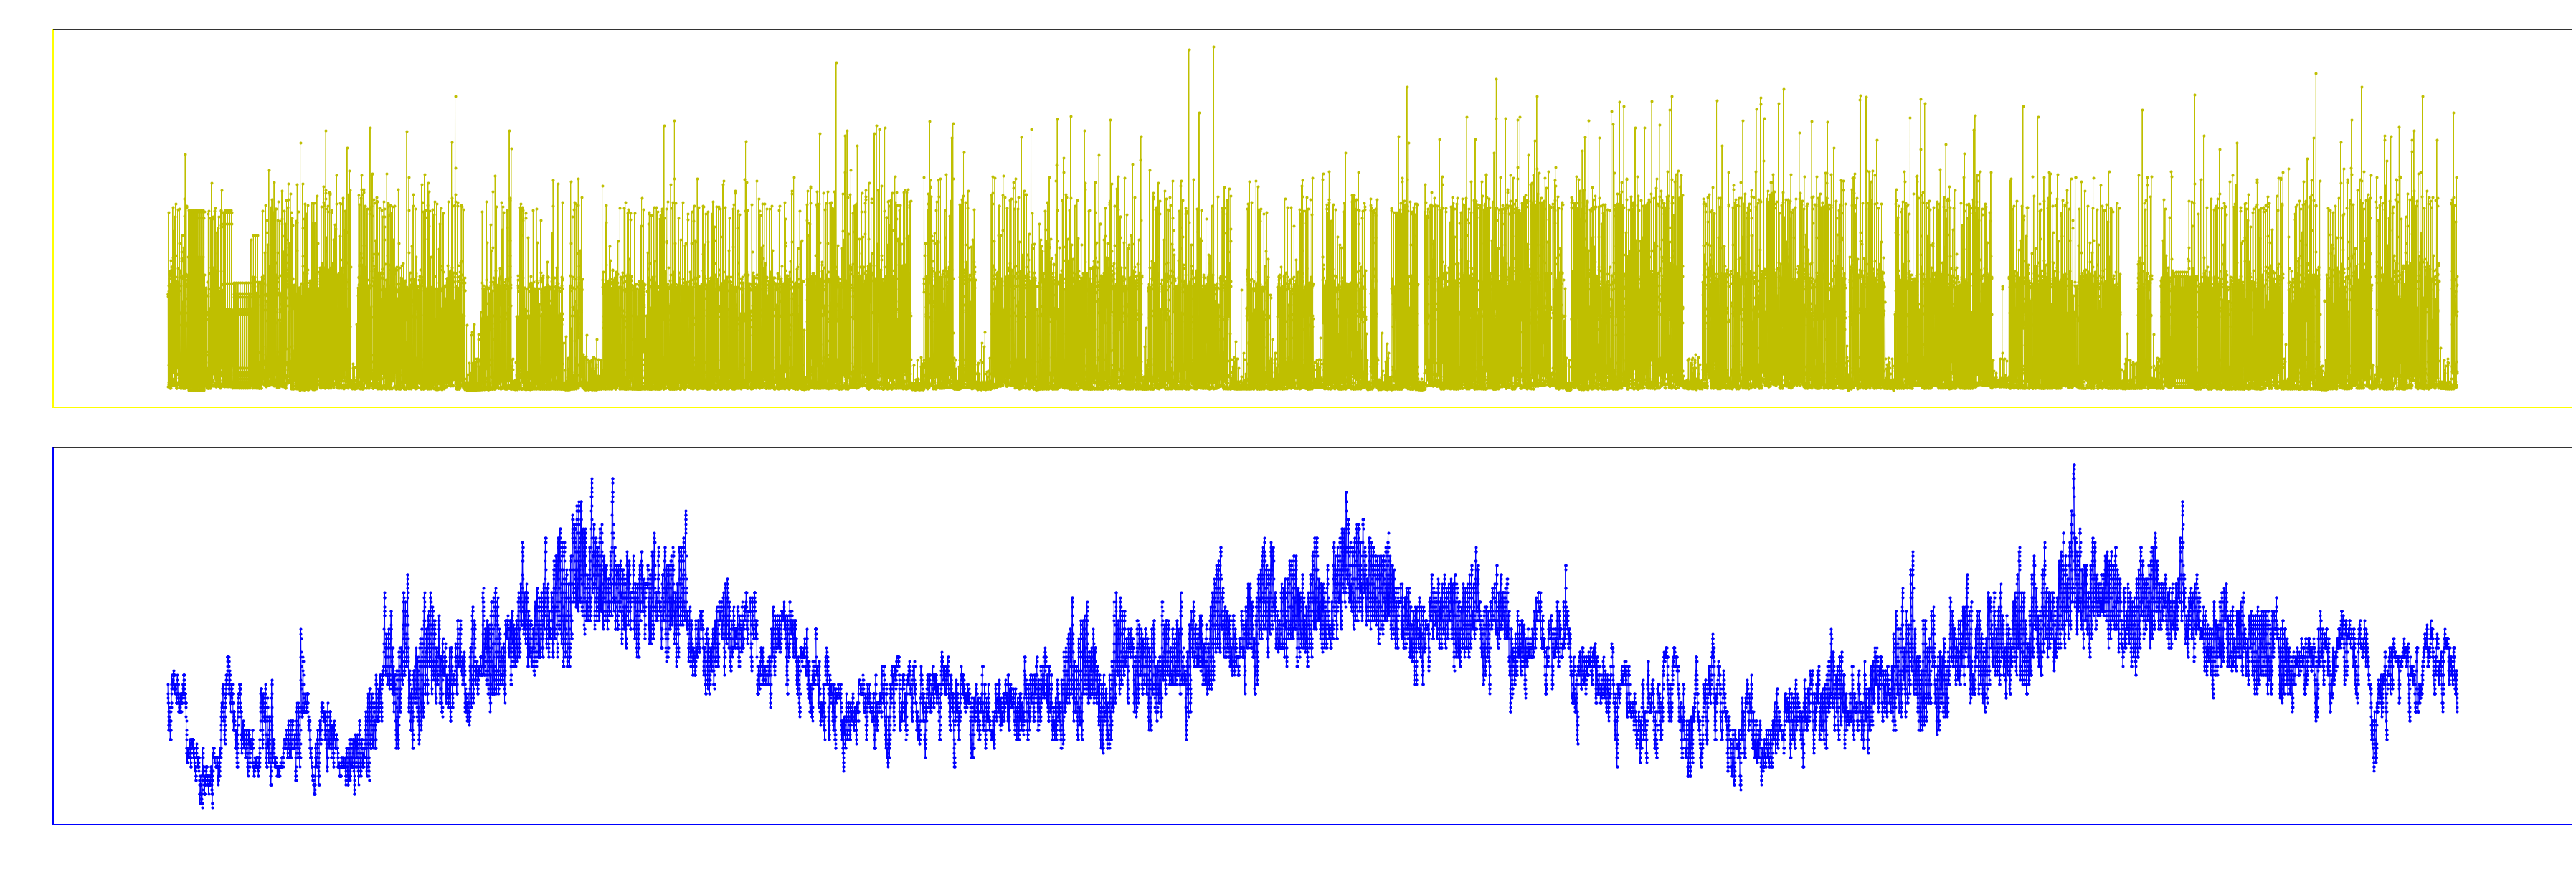

In [51]:
x = Data_3Y_scaled['index']

y1 = Data_3Y_scaled['Watt']
y2 = Data_3Y_scaled['Temp']
plt.figure(figsize=(50,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("13-15's Scaled Time-Watt Graph","13-15's Scaled Time-Temp Graph", 3)

#### Test Set 1년치 정규화

In [65]:
Data_2016.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', 'Temp']
Data_2016_scaled = scaler.fit_transform(Data_2016[scale_cols])
Data_2016_scaled = pd.DataFrame(Data_2016_scaled)
Data_2016_scaled.columns = scale_cols

Data_2016_scaled=Data_2016_scaled.reset_index()
Data_2016_scaled

,index,Holiday,Watt,Temp
0,0,1.0,0.278738,0.220588
1,1,1.0,0.018443,0.205882
2,2,1.0,0.016355,0.176471
3,3,1.0,0.009976,0.176471
4,4,1.0,0.006960,0.176471
...,...,...,...,...
8755,8755,1.0,0.024707,0.294118
8756,8756,1.0,0.182809,0.294118
8757,8757,1.0,0.089781,0.264706
8758,8758,1.0,0.049878,0.264706


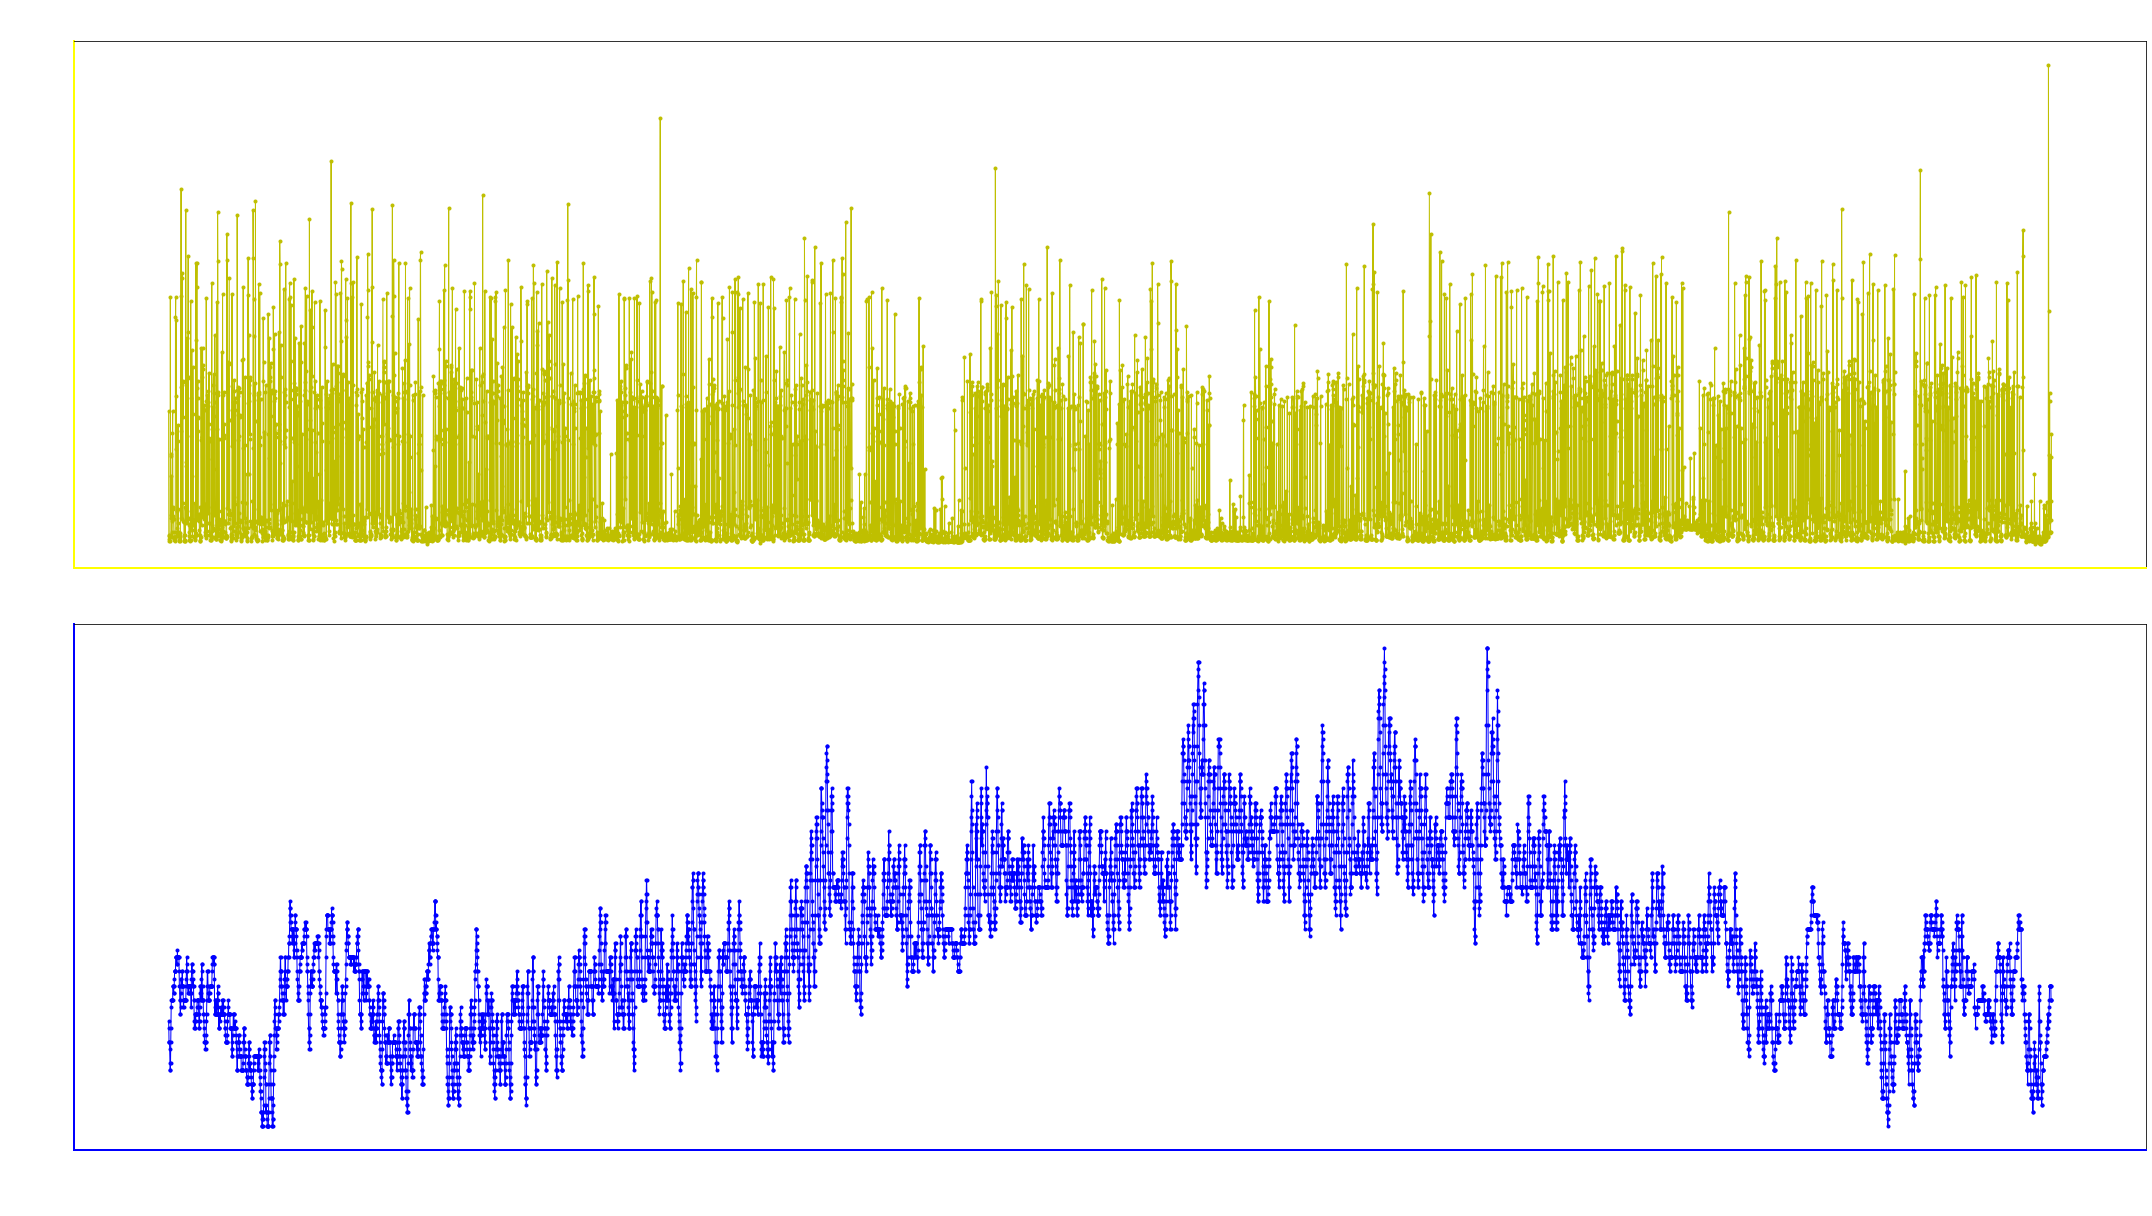

In [51]:
x = Data_2016_scaled['index']

y1 = Data_2016_scaled['Watt']
y2 = Data_2016_scaled['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2016's Scaled Time-Watt Graph","2016's Scaled Time-Temp Graph")

#### 데이터셋 분할

In [114]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# X, Y 데이터 설정
X = Data_3Y_scaled.iloc[:, [0,1,3]]
Y = Data_3Y_scaled.iloc[:, [0,2]]

from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [116]:
X_train

,index,Holiday,Temp
1023,1023,0.0,0.146667
14073,14073,1.0,0.586667
1461,1461,1.0,0.173333
6295,6295,0.0,0.440000
6805,6805,0.0,0.426667
...,...,...,...
13123,13123,0.0,0.573333
19648,19648,0.0,0.373333
9845,9845,1.0,0.333333
10799,10799,0.0,0.213333


In [ ]:

X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)